In [1]:
#upload file json

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gumballsadas","key":"5f179dfc205fe78873257f8087d6f2f0"}'}

In [2]:
#membuat directory kaggle dan dataset
!mkdir ~/.kaggle
!mkdir datasets
#Buat direktori bernama kaggle dan salin file kaggle.json di sana.
!cp kaggle.json ~/.kaggle/
#Ubah hak akses file
!chmod 600 ~/.kaggle/kaggle.json
#list kaggle dataset
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           2810         81  1.0              
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          19193        539  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           2026         57  1.0              
fuarresvij/gdp-growth-around-the-globe                      

## Business Understanding
Para penyedia jasa aplikasi pemutaran film harus meningkatkan performa sistem rekomendasi untuk kepuasan para pelanggannya ketika menggunakan jasa aplikasi pemutaran film.
### Problem Statement
- Bagaimana cara merekomendasikan film yang disukai dan dapat diminati oleh pengguna dan dijadikan rekomendasi?
### Goal
- Membuat sistem rekomendasi film yang disukai oleh pengguna
### Solution Approach
Solusi yang saya ajukan yaitu dengan menggunakan 2 algoritma machine learning untuk sistem rekomendasi yaitu:
- Collaborative Filtering adalah algoritma yang bergantung pada pendapat komunitas pengguna. Dia tidak memerlukan atribut untuk setiap itemnya. Algoritma ini memberikan rekomendasi berdasarkan nilai rating atau nilai lain, disini saya menggunakan target sebagai dasar penilaian[2].
- Content Based Filtering adalah algoritma yang merekomendasikan item serupa dengan apa yang disukai pengguna, berdasarkan tindakan mereka sebelumnya atau umpan balik eksplisit. Algoritma ini memberikan rekomendasi berdasarkan aktivitas pada masa lalu[3].

In [3]:
!kaggle datasets download -d rohan4050/movie-recommendation-data

 84% 11.0M/13.1M [00:00<00:00, 51.0MB/s]
100% 13.1M/13.1M [00:00<00:00, 57.6MB/s]


In [4]:
#unzip dataset yang telah didownload
!unzip /content/movie-recommendation-data -d datasets/

Archive:  /content/movie-recommendation-data.zip
  inflating: datasets/ml-latest-small/links.csv  
  inflating: datasets/ml-latest-small/movies.csv  
  inflating: datasets/ml-latest-small/ratings.csv  
  inflating: datasets/ml-latest-small/tags.csv  
  inflating: datasets/movies_metadata.csv  


## Data Understanding
Data yang digunakan adalah data yang ada pada kaggle [Movie Recommendation Data](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data)

Dataset memiliki 4 *files* csv yang kita gunakan untuk sistem rekomendasi adalah:
 - movies.csv :  File Metadata Film utama. Berisi informasi tentang 9000 film yang ditampilkan dalam kumpulan data Full MovieLens. Fitur termasuk poster, latar belakang, anggaran, pendapatan, tanggal rilis, bahasa, negara produksi, dan perusahaan.
 - links.csv : Berisi ID TMDB (The Movie Database) dan IMDB (Internet Movie Database) dari sebagian kecil dari 9.000 film dari Kumpulan Data Lengkap.
 - ratings.csv : Sub kumpulan 100.000 peringkat dari 700 pengguna di 9.000 film.
 - tags.csv : berisi label untuk film



 Keterangan kolom:
- genre - merupakan ragam jenis film
- tmbdId - merupakan TMBD id
- imbdId - merupakan IMBD id
- title - merupakan judul film
- movieId - TMBD id
- rating - nilai rating
- tag - label film

In [51]:
#membaca semua file yang telah didownload
import pandas as pd
 
link = pd.read_csv('/content/datasets/ml-latest-small/links.csv')
movie = pd.read_csv('/content/datasets/ml-latest-small/movies.csv')
rating = pd.read_csv('/content/datasets/ml-latest-small/ratings.csv')
tag = pd.read_csv('/content/datasets/ml-latest-small/tags.csv')

print('Jumlah data link movie : ', len(link.movieId.unique()))
print('Jumlah data movie : ', len(movie.movieId.unique()))
print('Jumlah data ratings dari user : ', len(rating.userId.unique()))
print('Jumlah data ratings dari user : ', len(rating.movieId.unique()))
print('Jumlah data : ', len(tag.movieId.unique()))

Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


In [52]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [53]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [54]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data Preparation
Teknik Data Preperation yang digunakan adalah:
-  menggabungkan isi dari semua file menjadi satu buah tabel output yang berisi userId,movieId,ratings,timestamp,title,genres.
- menkonversi beberapa data menjadi bentuk list dan dictonary.
- TrainTestSplit() untuk membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus dilakukan sebelum membuat model. Mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. nilai yang digunakan untuk test adalah 0.2 atau 20% sehingga nilai yang digunakan untuk train adalah 0.8 atau 80% sehingga perbandingan rasio train/test adalah 80:20.

In [56]:
import numpy as np
 
# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    link.movieId.unique(),
    movie.movieId.unique(),
    rating.movieId.unique(),
    tag.movieId.unique(),
))
 
# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))
 
print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


In [57]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    rating.userId.unique(),
    tag.userId.unique(),
   
))
 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


In [58]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [59]:
movie.groupby('movieId').sum()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [60]:
semua_rate = rating
semua_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [61]:
nama_film = pd.merge(semua_rate, movie[['movieId','title','genres']], on='movieId', how='left')
nama_film

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [62]:
# Menggabungkan dataframe genres dengan nama_film dan memasukkannya ke dalam variabel semua_film
semua_film = pd.merge(nama_film, tag[['movieId','tag']], on='movieId', how='left')
semua_film

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


In [63]:
#membuang data yang cacat
semua_film_clean = semua_film.dropna()
semua_film_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


In [64]:
#menyusun nilai dari movieid
fix_movie = semua_film_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


In [65]:
#melihat jumlah data unik
len(fix_movie.movieId.unique())

1554

In [66]:
#menyusun movieid
persiapan = fix_movie
persiapan.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


In [67]:
# Membuang data duplikat pada variabel persiapan
persiapan = persiapan.drop_duplicates('movieId')
persiapan

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


In [68]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = persiapan['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = persiapan['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = persiapan['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


In [69]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## Modeling
### Content Based Filtering
- Content based filtering menggunakan informasi tentang beberapa item/data untuk merekomendasikan kepada pengguna sebagai referensi mengenai informasi yang digunakan sebelumnya. Tujuan dari content based filtering adalah untuk memprediksi persamaan sejumlah informasi yang didapat dari pengguna. Sebagai contoh, seorang pendengar musik sedang mendengar musik bergenre reggae. Platform musik online secara sistem akan merekomendasikan si pengguna untuk mendengarkan musik lain yang berhubungan dengan reggae. Dalam pembuatannya, content based filtering menggunakan konsep perhitungan Cosine Similarity yang intinya mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama.

- Cosine similarity mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Ia menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity.
#### Keuntungan Content Based Filtering
- Model tidak memerlukan data tentang pengguna lain, karena rekomendasi bersifat khusus untuk pengguna ini. Hal ini mempermudah penskalaan ke sejumlah besar pengguna.
- Model ini dapat menangkap minat spesifik pengguna, dan dapat merekomendasikan item khusus yang sangat diminati oleh sedikit pengguna lain
#### Kekurangan Content Based Filtering
- Karena representasi fitur item dirancang secara manual hingga tingkat ini, teknik ini memerlukan banyak pengetahuan domain. Oleh karena itu, model hanya bisa sebaik fitur yang dirancang dengan tangan
- Model hanya dapat membuat rekomendasi berdasarkan minat pengguna yang ada. Dengan kata lain, model memiliki kemampuan terbatas untuk memperluas minat pengguna yang ada

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [71]:
#Pelajari kosakata dan idf, kembalikan matriks istilah dokumen.
tfidf_matrix = tf.fit_transform(movie_new['genre']) 
tfidf_matrix.shape

(1554, 24)

In [72]:
#convert to dense
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

In [73]:
#menampilkan data frame
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,children,mystery,adventure,drama,film,imax,comedy,genres,musical,war,...,romance,western,fi,no,fantasy,animation,thriller,listed,sci,action
movie_name,,,,,,,,,,,,,,,,,,,,,
"King and I, The (1956)",0.0,0.000000,0.0,0.321583,0.0,0.0,0.000000,0.0,0.796484,0.000000,...,0.512052,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
"Tetsuo, the Ironman (Tetsuo) (1988)",0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.455184,0.0,0.0,0.0,0.371780,0.0,0.455184,0.401915
Pillow Talk (1959),0.0,0.000000,0.0,0.000000,0.0,0.0,0.412204,0.0,0.766379,0.000000,...,0.492697,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Lilya 4-Ever (Lilja 4-ever) (2002),0.0,0.000000,0.0,0.462197,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Safety Last! (1923),0.0,0.000000,0.0,0.000000,0.0,0.0,0.481436,0.0,0.000000,0.000000,...,0.575449,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.661119
I'm Not Scared (Io non ho paura) (2003),0.0,0.745376,0.0,0.339161,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.573920,0.0,0.000000,0.000000
Jarhead (2005),0.0,0.000000,0.0,0.304359,0.0,0.0,0.000000,0.0,0.000000,0.772897,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.556774
Bug (2007),0.0,0.000000,0.0,0.319676,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.540947,0.0,0.000000,0.000000
"Nights of Cabiria (Notti di Cabiria, Le) (1957)",0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [74]:
#menghitung nilai cosine
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

In [75]:
#menampilkan dataframe cosine
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Grease (1978),"Walk, Don't Run (1966)","Third Man, The (1949)",Paper Clips (2004),Infernal Affairs (Mou gaan dou) (2002)
movie_name,,,,,
"Children of Heaven, The (Bacheha-Ye Aseman) (1997)",0.329657,0.513174,0.00000,0.0,0.218566
Stand by Me (1986),0.000000,0.000000,0.00000,0.0,0.170791
Pi (1998),0.000000,0.000000,0.15798,0.0,0.398665
Don Juan DeMarco (1995),0.578747,0.900930,0.00000,0.0,0.157993
Man on the Moon (1999),0.329657,0.513174,0.00000,0.0,0.218566
Danny Deckchair (2003),0.642388,1.000000,0.00000,0.0,0.000000
"Mask of Zorro, The (1998)",0.481972,0.750281,0.00000,0.0,0.000000
Tokyo Godfathers (2003),0.000000,0.000000,0.00000,0.0,0.111604
Matchstick Men (2003),0.216119,0.336430,0.00000,0.0,0.670747


In [76]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):
   
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [77]:
#mencari rekomendasi yang mirip
movie_new[movie_new.movie_name.eq('Grumpier Old Men (1995)')]

,id,movie_name,genre
2,3,Grumpier Old Men (1995),Comedy|Romance


In [78]:
#hasil rekomendasi
movie_recommendations('Grumpier Old Men (1995)')

,movie_name,genre
0,Coming to America (1988),Comedy|Romance
1,Woman of the Year (1942),Comedy|Romance
2,Crossing Delancey (1988),Comedy|Romance
3,Desk Set (1957),Comedy|Romance
4,Legally Blonde (2001),Comedy|Romance


## Modeling
### Collorative Filtering
Metode Colaborative filtering merupakan metode yang melakukan proses penyaringan item yang berdasarkan pengguna lain, dengan cara memberikan informasi kepada pengguna berdasarkan kemiripan karakteristik. Dalam pembuatanya saya menggunakan RecommenderNet, pada tahap ini model menghitung skor kecocokan antara pengguna dan musik dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan musik. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan musik. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan musik. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Metode ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.
#### Kelebihan
- Kita tidak memerlukan pengetahuan domain karena penyematan dipelajari secara otomatis.
- Model dapat membantu pengguna menemukan minat baru. Secara terpisah, sistem ML mungkin tidak tahu apakah pengguna tertarik dengan item tertentu, tetapi model mungkin masih merekomendasikannya karena pengguna serupa tertarik pada item tersebut.
- Sampai batas tertentu, sistem hanya memerlukan matriks masukan untuk melatih model faktorisasi matriks. Secara khusus, sistem tidak memerlukan fitur kontekstual. Dalam praktiknya, hal ini dapat digunakan sebagai salah satu dari beberapa generator kandidat.
#### Kekurangan
- Prediksi model untuk pasangan (pengguna, item) tertentu adalah produk titik dari penyematan yang sesuai. Jadi, jika item tidak terlihat selama pelatihan, sistem tidak dapat membuat penyematan untuk item tersebut dan tidak dapat melakukan kueri model dengan item ini. Masalah ini sering disebut masalah cold start
- Fitur samping adalah setiap fitur di luar kueri atau ID item. Untuk rekomendasi film, fitur samping mungkin menyertakan negara atau usia. Menyertakan fitur samping yang tersedia akan meningkatkan kualitas model. Meskipun mungkin tidak mudah untuk menyertakan fitur samping di WALS, generalisasi WALS memungkinkan hal ini.

In [79]:
#import library
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [80]:
#menampilkan file rating
df = rating
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [81]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [82]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
 
# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.
 
# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

In [83]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
df['ratings'] = df['rating'].values.astype(np.float32)
 
min_rating = min(df['rating'])
 
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


In [84]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


In [85]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values
 
# Membuat variabel y untuk membuat ratings dari hasil 
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


In [86]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [87]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [88]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1261/1261 [==============================] - 13s 10ms/step - loss: 0.6374 - root_mean_squared_error: 0.2335 - val_loss: 0.6208 - val_root_mean_squared_error: 0.2151
Epoch 2/50
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6143 - root_mean_squared_error: 0.2093 - val_loss: 0.6189 - val_root_mean_squared_error: 0.2128
Epoch 3/50
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6095 - root_mean_squared_error: 0.2040 - val_loss: 0.6171 - val_root_mean_squared_error: 0.2110
Epoch 4/50
1261/1261 [==============================] - 14s 11ms/step - loss: 0.6075 - root_mean_squared_error: 0.2018 - val_loss: 0.6140 - val_root_mean_squared_error: 0.2077
Epoch 5/50
1261/1261 [==============================] - 13s 10ms/step - loss: 0.6060 - root_mean_squared_error: 0.1999 - val_loss: 0.6135 - val_root_mean_squared_error: 0.2071
Epoch 6/50
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6067 - root_mean_squared_error: 0.2004 - v

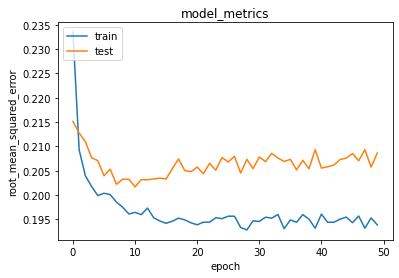

In [89]:
#visualisasi model
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
#mendapatkan rekomendasi film
movie_df = movie_new
df = pd.read_csv('/content/datasets/ml-latest-small/ratings.csv')
 

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched))

In [94]:
#menampilkan hasil rekomendasi
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

39/39 [==============================] - 0s 2ms/step
Showing recommendations for users: 64
movie with high ratings from user
--------------------------------
One Flew Over the Cuckoo's Nest (1975) : Drama
Apocalypse Now (1979) : Action|Drama|War
Spring, Summer, Fall, Winter... and Spring (Bom yeoreum gaeul gyeoul geurigo bom) (2003) : Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964) : Drama|Musical|Romance
Paths of Glory (1957) : Drama|War
Man Bites Dog (C'est arrivé près de chez vous) (1992) : Comedy|Crime|Drama|Thriller
Adam's Rib (1949) : Comedy|Romance
Jetée, La (1962) : Romance|Sci-Fi
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997) : Action|Animation|Drama|Fantasy|Sci-Fi
Tekkonkinkreet (Tekkon kinkurîto) (2006) : Action|Adventure|Animation|Crime|Fantasy
Inside Job (2010) : Documentary
Captain Fantast